<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes the final.
- Here we will work on TensorFlow Dataset [stanford_dogs dataset](https://www.tensorflow.org/datasets/catalog/stanford_dogs).
- The goal of this final is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.70. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named final.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Exam/final/.

# Notebook Configuration

## Google drive

In [1]:
# from google.colab import drive
import sys

# Mount Google Drive
# drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = ''

# Get the absolute path of the deep utilities folder
abspath_util_deep = ''

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
# %tensorflow_version 2.x 
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [7]:
# Change working directory to the absolute path of the deep utilities folder
# %cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

## Loading the data

### Creating the directory for the data

In [9]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading the data to the directory

In [11]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'StanfordDogs'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True,
                       with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling data/stanford_dogs/0.2.0.incomplete8VEZBG/stanford_dogs-train.tfrecord*...:   0%|          | 0/12000…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling data/stanford_dogs/0.2.0.incomplete8VEZBG/stanford_dogs-test.tfrecord*...:   0%|          | 0/8580 […

Dataset stanford_dogs downloaded and prepared to data/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [14]:
info.splits

{Split('train'): <SplitInfo num_examples=12000, num_shards=4>,
 Split('test'): <SplitInfo num_examples=8580, num_shards=4>}

In [12]:
classes = info.features['label'].names

In [15]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

120

In [16]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data2/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data2/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data2/',
                      as_supervised=True)

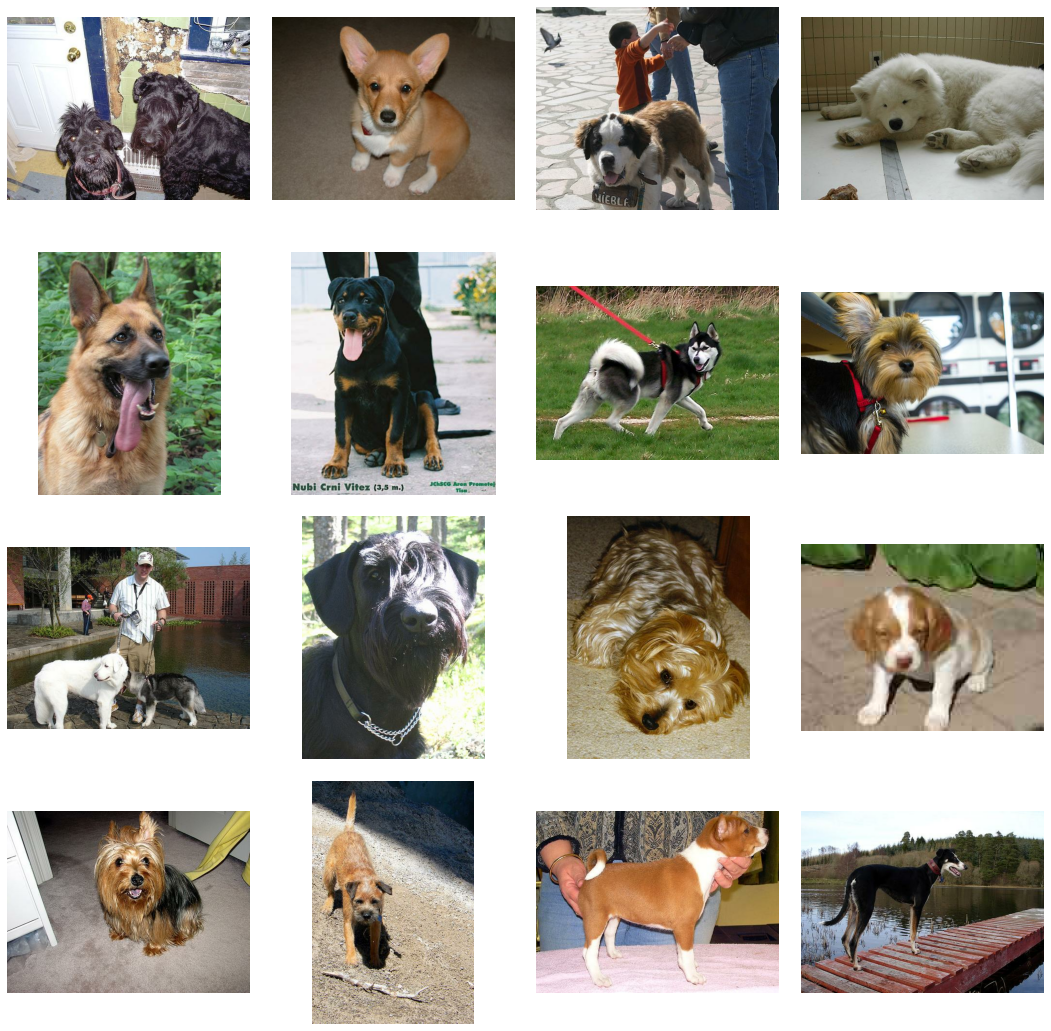

In [17]:
tmp_x = []
plt_idx = 431
fig = plt.figure(figsize=(15, 15))
for tmp_batch, i in zip(data_train.shuffle(buffer_size=100).as_numpy_iterator(), range(16)):
    tmp_x = tmp_batch[0].astype(int)
    plt.subplot(4,4,1+i)
    plt.imshow(tmp_x)
    plt.axis('off')
    plt_idx += 1
fig.tight_layout()
plt.show()

Applicable augmentations:
1. Horizontal flip
2. Gaussian White Noise
3. Random Scale In and Out
4. Random horizontal and vertical shift
5. Random Contrast
6. Random Height - Experimental
7. Random Brightness
8. Random Width - Experimental
9. Random rotation

## Preprocessing the data using pretrained model

In [18]:
global input_size
input_size = [256, 256]

In [19]:
# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

# Resize the test data
data_test = data_test.map(resize)

In [20]:
resnet50v2 = tf.keras.applications.ResNet50V2(include_top=False)

94668760/94668760 [==============================] - 3s 0us/step


In [21]:
augmentation = Sequential([RandomFlip(mode='horizontal'),
                           #GaussianNoise(stddev=np.sqrt(0.05)),
                           #RandomZoom(height_factor=[0.8, 1.], width_factor=[0.8, 1.]),
                           RandomTranslation(height_factor=[-0.2, 0.2], width_factor=[-0.2, 0.2]),
                           #RandomContrast(factor=0.2),
                           #RandomBrightness(factor=[0.8, 1.]),
                            RandomRotation(factor=[-0.3, 0.3])
                          ])                          

In [22]:
preprocessing = Sequential([InputLayer(input_shape=[256, 256, 3], batch_size=None),
                            Rescaling(scale=1./255),
                            augmentation])

## Shuffling, batching and prefetching the data

In [23]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 12

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(10)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(10)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(10)

In [24]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Creating the directory for the model

In [25]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/resnet/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [ ]:
tmp_batch[1]

In [26]:
# Add the pretrained layers
# resnet50v2 # already loaded in pre-processing section.
model = Sequential([preprocessing,
                    resnet50v2,
                    GlobalAveragePooling2D(),
                    BatchNormalization(),
                    Dense(n_classes, activation='softmax')])
                    
model.build(input_shape=[None,256,256,3])
# model.summary()

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 23,818,872
Trainable params: 23,769,336


## Freeze the pretrained layers

In [28]:
for layer in resnet50v2.layers:
    layer.trainable = False

In [29]:
for layer, _ in zip(model.layers[1].layers, range(5)):
    print(layer.trainable)

False
False
False
False
False


## Setting Callbacks

In [30]:
# ModelCheckpoint callback
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                   factor=0.1,
                                                   patience=3,
                                                   verbose=1,
                                                   mode='min',
                                                   min_delta=1e-13,
                                                   min_lr=1e-7)


model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + 'result/resnet/model.h5',
                                                      monitor='val_loss',
                                                      mode='min',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# Early Stopping Callback
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                         min_delta=1e-4,
                                         patience=4,
                                         verbose=1,
                                         mode='min',
                                         restore_best_weights=True)

terminate_nan_cb = tf.keras.callbacks.TerminateOnNaN()

# Training

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [31]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [32]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=100,
                    validation_data=data_valid,
                    callbacks=[lr_schedule, model_checkpoint_cb, 
                               es_cb, terminate_nan_cb],
                    workers=16,
                    use_multiprocessing=True)

Epoch 1/100


700/700 [==============================] - 107s 133ms/step - loss: 4.9428 - accuracy: 0.2860 - val_loss: 1.5307 - val_accuracy: 0.6183 - lr: 0.0100
Epoch 2/100
700/700 [==============================] - 90s 127ms/step - loss: 2.5874 - accuracy: 0.4118 - val_loss: 1.4383 - val_accuracy: 0.6256 - lr: 0.0100
Epoch 3/100
700/700 [==============================] - 90s 126ms/step - loss: 2.4770 - accuracy: 0.4361 - val_loss: 1.4004 - val_accuracy: 0.6439 - lr: 0.0100
Epoch 4/100
700/700 [==============================] - 90s 126ms/step - loss: 2.4333 - accuracy: 0.4515 - val_loss: 1.4601 - val_accuracy: 0.6494 - lr: 0.0100


In [ ]:
# Implement me

# Testing

In [ ]:
# Implement me